<a href="https://colab.research.google.com/github/Prolific144/Bazu/blob/main/SnooG_TEST0045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SnooG Alogarithm**

#Packages

Installing

In [ ]:
pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 KB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28643 sha256=8c0317345998431732ce990e685cb7c98aa7a4d83618331c87548da03f9aba04
  Stored in directory: /root/.cache/pip/wheels/df/33/51/592213372072da189a4ff8f471838cadcc91add5821f7b9b38
Successfully built yahoofinancials


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.2 MB/s eta 0:00:00


In [ ]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 1.8 MB/s eta 0:00:00


Modules

In [ ]:
import os
import warnings
from warnings import catch_warnings
from warnings import filterwarnings
import numpy as np
import pandas as pd
import scipy
from numpy.random import normal, seed
from scipy.stats import norm
from dateutil.parser import parse
import itertools
from google.colab import drive
import requests
from bs4 import BeautifulSoup
import base64

# Visualization Time Series Data
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from pylab import rcParams
from plotly import tools
import plotly.offline as offline
import plotly.figure_factory as ff
import plotly as py
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf

# Import yfinance package
import yfinance as yf
from yahoofinancials import YahooFinancials

#Statistics
import math
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

from pandas.plotting import autocorrelation_plot
from pmdarima.arima import auto_arima
import pmdarima as pmd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, GRU, Bidirectional

from IPython.display import HTML


import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data

#from keras.optimizers import SGD

#Important
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
offline.init_notebook_mode()
plt.style.use('fivethirtyeight')
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
tf.__version__
#print(os.listdir("C:/Users/Admin/Documents/SnooG/Python"))

'2.11.0'

#Functions

In [ ]:
def create_download_link( df, title = "Download CSV file", filename = "Snoog_Analytics.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [ ]:
def create_and_set_working_directory(root_dir, project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )


#drive.mount('/content/drive/')

In [ ]:
# Getting the data
def stock_download(ticker, start, end, frequency):
    df = yf.download(ticker, start, end)
    return df

#DATA VALIDATION
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

# function that imputes a dataframe
def impute_knn(df):

    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan

    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ldf,ldf_putaside],axis=1)

def fill_missing_value_mean(df):
    for i in df.columns:
        if (df[i].dtype=='float64'):
            df[i]=df[i].fillna(np.mean(df[i]))
    return df

def handle_missing_values(df):
    df.fillna(0,inplace=True)

def plot_histogram(df, title=None):
    df.hist(figsize=(15,10))

def correlation_matrix(df):
    return df.corr()

def plot_boxplot(df):
    df.boxplot(figsize=(15,10))

def data_normalization(df):
    return (df-df.mean())/df.std()

In [ ]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

In [ ]:
# plotting the price from above function
def plot_daily_eurgbp_price(df, price):
    fig = px.line(df,x=df.index, y=price,  title="Visualizing Daily Adjusted Close Prices", range_x=['2018-07-01','2022-03-17'])
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

# Plotting multiple time series data in plotly
def plot_daily_eurgbp_ohcl_price(df):
    fig = go.Figure(data=[
        go.Scatter(name='Open', x=df.index, y=df['Open'], line_color='blue'),
        go.Scatter(name='High', x=df.index, y=df['High'], line_color='green'),
        go.Scatter(name='Low', x=df.index, y=df['Low'], line_color='red'),
        go.Scatter(name='Close', x=df.index, y=df['Close'], line_color='black'),
        go.Scatter(name='Adj Close', x=df.index, y=df['Adj Close'], line_color='brown')
    ])

    fig.update_layout(
        title='Visualizing Daily Adjusted Close Prices',
        xaxis_rangeslider_visible=True
    )

    fig.show()

DECOMPOSING

In [ ]:
def ts_transform(timeseries, model, freq):
    result = data_decompose(timeseries, model=model, freq=freq)
    ts_trend = result.trend
    ts_seasonal = result.seasonal
    ts_resid = result.resid
    ts_observed = result.observed
    return ts_trend, ts_seasonal, ts_resid, ts_observed

#test
#ts_transform(df['High'], 'Aditive', 30)

def plot_decompose(df):

    # Plot trend, seasonal and residual
    plt.subplot(411)
    plt.plot(ts, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(ts_trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(ts_seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(ts_resid, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return plot_decompose


def plot_decompose2(df):
  #plot the above 4 series using subplots
  plt.figure(figsize=(10,10))
  plt.subplot(4,1,1)
  plt.plot(ts_trend)
  plt.ylabel('trend')
  plt.subplot(4,1,2)
  plt.plot(ts_seasonal)
  plt.ylabel('seasonal')
  plt.subplot(4,1,3)
  plt.plot(ts_resid)
  plt.ylabel
  return plot_decompose2

DIFFERENCIATION AND STATIONARITY TEST

In [ ]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        if not np.isnan(value):
            diff.append(value)
    return pd.Series(diff)


#data_diff=difference(df.High, interval=1)
# invert difference
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

def Test_Stationarity1(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

def Test_Stationarity2(dataframe):
    from statsmodels.tsa.stattools import adfuller, kpss
    test=dataframe
    #ADF Test
    result = adfuller(test, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')


    # KPSS Test
    stats, p, lags, critical_values = kpss(test, 'ct')
    print(f'KPSS Test Statistics: {stats}')
    print(f'p-value: {p}')

    if p<0.05:
          print('Series is not Stationary')
    else:
          print('Series is Stationary')


def Test_Stationarity3(timeseries, title):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
#test_stationarity(data_diff,'raw data')

Train Test Split

In [ ]:
#Train Test Split
#divide into train and validation set
def train_test_split(data, ratio):
  train = data[:int(ratio*(len(data)))]
  test = data[int(ratio*(len(data))):]
  return train, test

#train, test = train_test_split(data_diff, 0.7)

def plot_train_test(train, test):
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Dates')
  plt.ylabel('Closing Prices')
  plt.plot(train, 'Maroon', label='Train data')
  plt.plot(test, 'Blue', label='Test data')
  plt.legend()
  plt.show()

In [ ]:
##Performing the Seasonal ARIMA
#Model fiting
#Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.
def arimamodel(timeseries):
    automodel = pmd.auto_arima(timeseries, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
    return automodel

def arimamodel2(timeseries):

  stepwise_model= auto_arima(timeseries, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
  return stepwise_model

def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods,
                                    return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1],
                           periods=n_periods, freq="W")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(timeseries.name)
    plt.fill_between(lower_series.index,
                     lower_series,
                     upper_series,
                     color="k",
                     alpha=0.25)
    plt.legend(("past", "forecast", "95% confidence interval"),
               loc="upper left")
    plt.show()

#automodel = arimamodel2(train)
#plotarima(70, train, automodel)

def arima_prediction(data, order):
    model = ARIMA(data, order=order)
    results = model.fit()
    results.plot_predict(1,20)
    plt.title("ARIMA prediction Visualization", size=20)
#arima_prediction(data_diff, (1, 1, 1))


In [ ]:
# Accuracy Metrics
def Regression_metrics(y_test, y_pred):
    #Root mean squared error
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root Mean Squared Error (RMSE): {np.round(RMSE, 2)}')

    # Median absolute error
    MAE = mean_absolute_error(y_test, y_pred)
    print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

    #Mean absolute percentage error (MAPE)
    MAPE = np.mean((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
    print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

    #Median Absolute Percentage Error
    MDAPE = np.median((np.abs(np.subtract(y_test, y_pred)/ y_test)) ) * 100
    print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

     # Mean squared error
    MSE = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {np.round(MSE, 2)}')

     # R-squared value
    R2 = r2_score(y_test, y_pred)
    print(f'R-squared (R2): {np.round(R2, 2)}')


def classification_metrics(y_test, y_pred):
    #ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for test set')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

    roc_auc = auc(fpr, tpr)
    print('ROC curve (AUC = %0.2f)' % roc_auc)

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    #Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {np.round(accuracy, 2)}')

    #Precision
    precision = precision_score(y_test, y_pred)
    print(f'Precision: {np.round(precision, 2)}')

    #Recall
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {np.round(recall, 2)}')

    #F1-score
    F1 = f1_score(y_test, y_pred)
    print(f'F1-score: {np.round(F1, 2)}')

    #Specificity
    specificity = specificity_score(y_test, y_pred)
    print(f'Specificity: {np.round(specificity, 2)}')

    #Sensitivity
    sensitivity = sensitivity_score(y_test, y_pred)
    print(f'Sensitivity: {np.round(sensitivity, 2)}')

    #Matthew's correlation coefficient
    MCC = matthews_corrcoef(y_test, y_pred)
    print(f'Matthews correlation coefficient: {np.round(MCC, 2)}')

In [ ]:
def search_results(query):
    page = requests.get("https://www.google.dz/search?q=" + query)
    soup = BeautifulSoup(page.content)
    links = soup.findAll("a")
    for link in links:
        if link['href'].startswith('/url?q='):
            print (link['href'].replace('/url?q=','').split('&')[0])

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):

    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):

    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)



NEXT STEP

#SnooG in Action

Search Button

In [ ]:
 search_results(input("Enter anythin you would like to search"))

Enter anythin you would like to searchbest kevin heart movies 2023
https://martincid.com/en/2023/02/die-hart-the-movie-2023-movie-review-funny-movie-with-kevin-hart-making-fun-of-himself/
https://movieweb.com/kevin-hart-new-movies-upcoming/
https://www.youtube.com/watch%3Fv%3DwsfOkhAlzDk
https://www.youtube.com/watch%3Fv%3DwsfOkhAlzDk
https://www.youtube.com/watch%3Fv%3D5c5_EiRRSWA
https://www.youtube.com/watch%3Fv%3D5c5_EiRRSWA
https://www.imdb.com/name/nm0366389/
https://www.nextflicks.tv/blog/kevin-hart-new-movie-where-can-you-watch-it/
https://screenrant.com/best-kevin-hart-movies-according-to-rotten-tomatoes/
https://screenrant.com/rock-kevin-hart-movies-ranked-worst-best/
https://www.rottentomatoes.com/m/die_hart_the_movie
https://www.whats-on-netflix.com/news/lift-kevin-harts-upcoming-netflix-movie-what-we-know-so-far-01-2023/
https://support.google.com/websearch%3Fp%3Dws_settings_location%26hl%3Den
https://accounts.google.com/ServiceLogin%3Fcontinue%3Dhttps://www.google.dz/sear

Downloading Currency Pair*

In [ ]:
start = '2017-01-01'
end = '2023-12-31'
frequency = 'daily'

print("Enter Currency Pair e.g EURUSD=X")
ticker = input("")

Data=stock_download(ticker, start, end, frequency)

Enter Currency Pair e.g EURUSD=X
EURUSD=X
[*********************100%***********************]  1 of 1 completed


tickers=['EURGBP=X', 'EURUSD=X', 'GBPUSD=X', 'NZDUSD=X','USDJPY=X','GBPJPY=X','EURJPY=X', 'AUDUSD=X','USDCHF=X']

In [ ]:
tickers=['EURGBP=X', 'EURUSD=X', 'GBPUSD=X', 'NZDUSD=X','USDJPY=X','GBPJPY=X','EURJPY=X', 'AUDUSD=X','USDCHF=X']

In [ ]:
 #Downloadind formart as a link
 create_download_link(Data)

#EXPLORATORY DATA ANALYSIS

DATA VALIDATION

In [ ]:
# Call function that imputes missing data
df = impute_knn(Data)

In [ ]:
fill_missing_value_mean(Data)
handle_missing_values(Data)

In [ ]:
missing_values_table(Data)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [ ]:
# looks like we have a full feature matrix
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1623 entries, 2017-01-02 to 2023-03-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1623 non-null   float64
 1   High       1623 non-null   float64
 2   Low        1623 non-null   float64
 3   Close      1623 non-null   float64
 4   Adj Close  1623 non-null   float64
 5   Volume     1623 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 88.8 KB


In [ ]:
correlation_matrix(Data)

Open       High        Low      Close  Adj Close  Volume
Open      1.00000000 0.99880743 0.99868146 0.99999490 0.99999490     NaN
High      0.99880743 1.00000000 0.99859084 0.99880431 0.99880431     NaN
Low       0.99868146 0.99859084 1.00000000 0.99867718 0.99867718     NaN
Close     0.99999490 0.99880431 0.99867718 1.00000000 1.00000000     NaN
Adj Close 0.99999490 0.99880431 0.99867718 1.00000000 1.00000000     NaN
Volume           NaN        NaN        NaN        NaN        NaN     NaN

In [ ]:
'''
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()
'''

'\nplt.figure(figsize=(15,7))\nsns.heatmap(df.corr(),annot=True,cmap="Blues")\nplt.title("Data Correlation",size=15)\nplt.ylabel("Columns",size=15)\nplt.xlabel("Columns",size=15)\nplt.show()\n'

In [ ]:
# Seaborn get a little slow, let's plot some interesting features
#tlist = ['Open','High','Low','Close','Adj Close','Volume']
#snsPairGrid(Data[tlist])

In [ ]:
#data_normalization(Data)

Data for Analysis

In [ ]:
df=Data.copy()

#DATA VISUALIZATION

## Visual

In [ ]:
#plot_boxplot(df)

In [ ]:
#plot_histogram(df, title='SnooG Analysis')

In [ ]:
# plot the adjusted close price
print("Enter Currency Dataframe e.g Adj Close, High, Low, Close, Open")

plot_daily_eurgbp_price(df, input(""))
#plot_daily_eurgbp_price(df, "Adj Close")
#plot_daily_eurgbp_price(df, "High")
#plot_daily_eurgbp_price(df, "Low")
#plot_daily_eurgbp_price(df, "Close")
#plot_daily_eurgbp_price(df, "Open")

Enter Currency Dataframe e.g Adj Close, High, Low, Close, Open
High


In [ ]:
plot_daily_eurgbp_ohcl_price(df)

##Multiple Plots

In [ ]:
'''
import matplotlib.dates as mdates # Formatting dates
# Plot line charts
df_plot = df.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

'''

'\nimport matplotlib.dates as mdates # Formatting dates\n# Plot line charts\ndf_plot = df.copy()\n\nncols = 2\nnrows = int(round(df_plot.shape[1] / ncols, 0))\n\nfig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))\nfor i, ax in enumerate(fig.axes):\n        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)\n        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)\n        ax.xaxis.set_major_locator(mdates.AutoDateLocator())\nfig.tight_layout()\nplt.show()\n\n'

## Smoothing

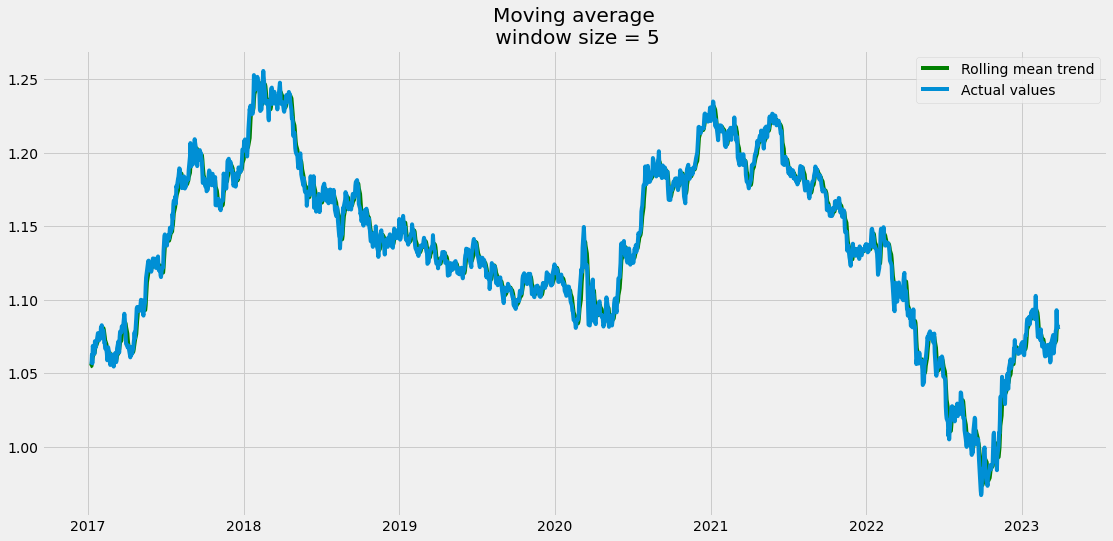

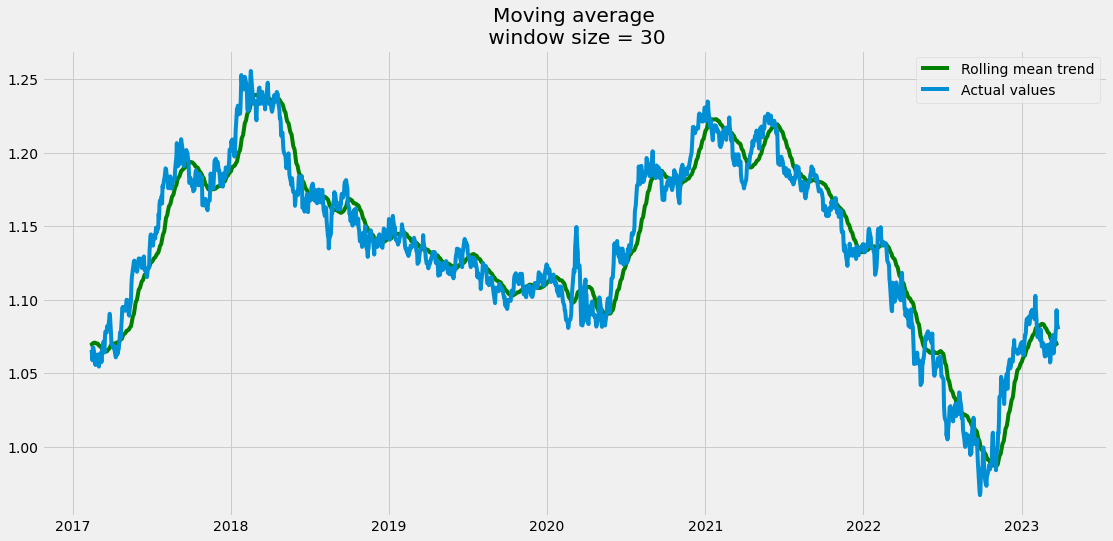

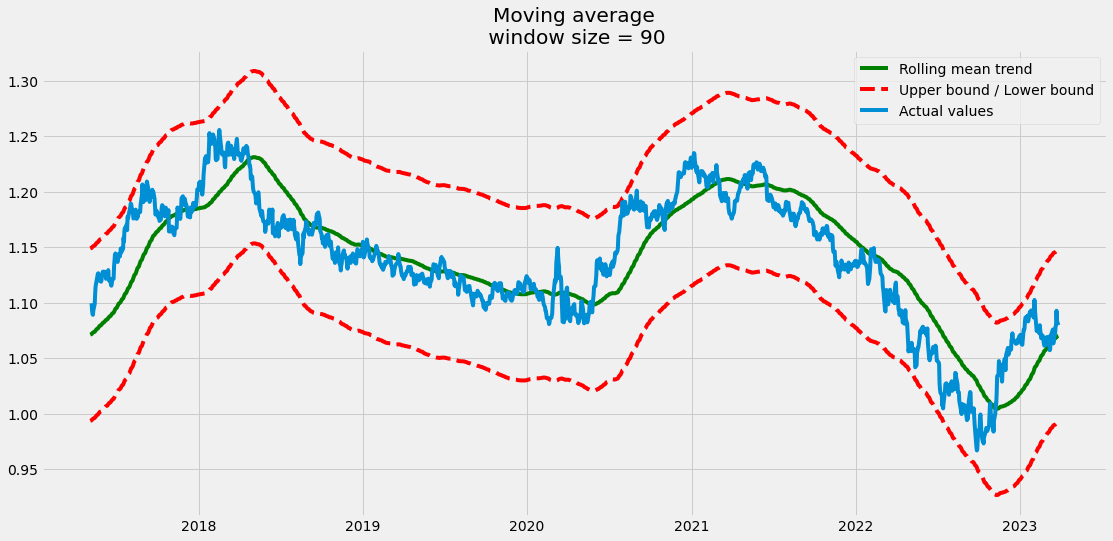

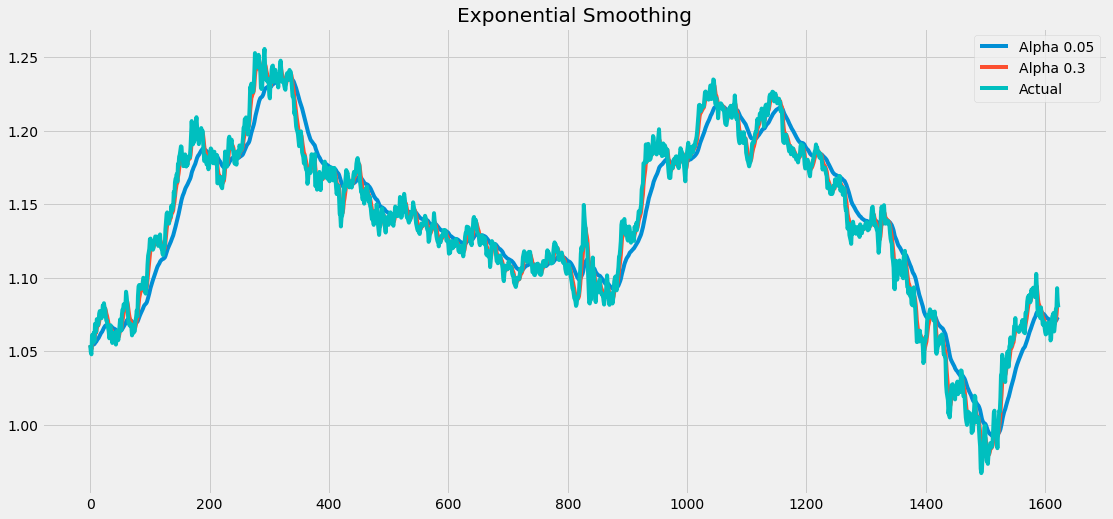

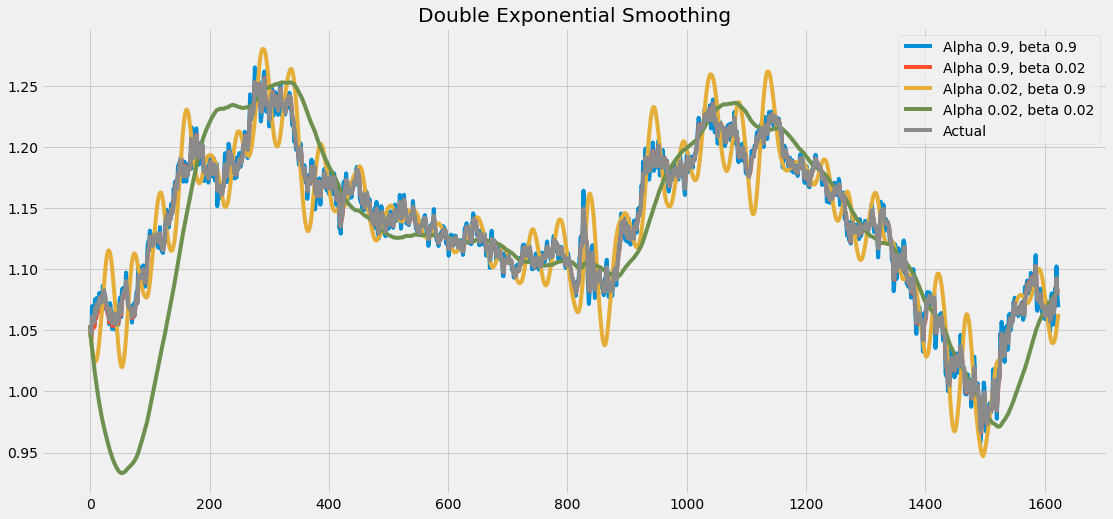

In [ ]:
#Smooth by the previous 5 days (by week)
plot_moving_average(df.High, 5)

#Smooth by the previous month (30 days)
plot_moving_average(df.High, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(df.High, 90, plot_intervals=True)


plot_exponential_smoothing(df.High, [0.05, 0.3])


plot_double_exponential_smoothing(df.High, alphas=[0.9, 0.02], betas=[0.9, 0.02])

#Test for Stationarity

##Data Transformation to achieve Stationarity

In [ ]:
print("Enter Currency Dataframe e.g df['Adj Close'], df['Close'], df['Low'], df['High'], df['Close']")

#ts_transform(input(""), 'Aditive', 30)

Enter Currency Dataframe e.g df['Adj Close'], df['Close'], df['Low'], df['High'], df['Close']


Differencing

In [ ]:
#print("Enter Currency Dataframe e.g df.Adj Close, df.Close, df.Low, df.High, df.Close")
#data_diff=difference(input(""), interval=1)
data_diff=difference(df.High, interval=1)

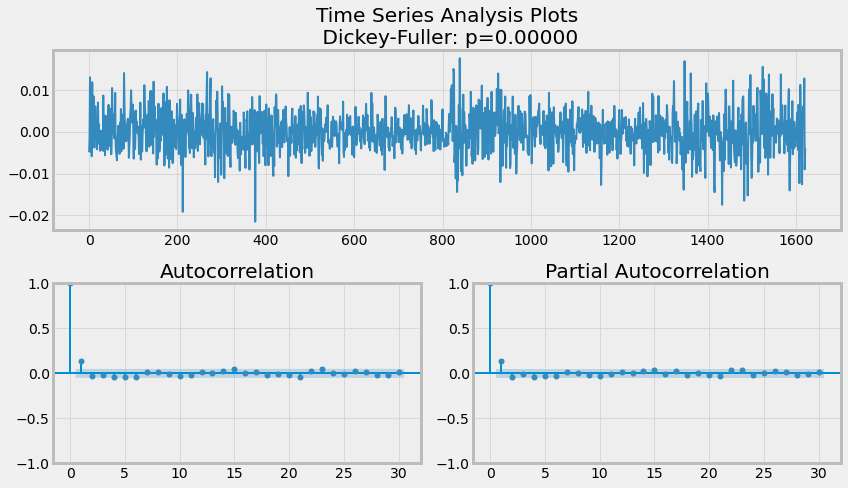

In [ ]:
tsplot(data_diff, lags=30)

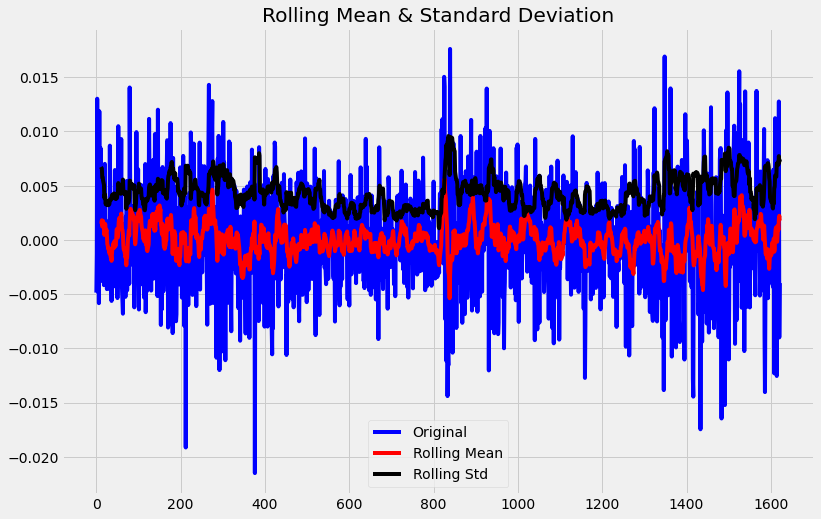

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                 -27.55852719
p-value                          0.00000000
#Lags Used                       1.00000000
Number of Observations Used   1620.00000000
Critical Value (1%)             -3.43439302
Critical Value (5%)             -2.86332576
Critical Value (10%)            -2.56772070
dtype: float64


In [ ]:
Test_Stationarity1(data_diff)

In [ ]:
Test_Stationarity2(data_diff)

ADF Statistic: -27.558527185429494
p-value: 0.0
Series is Stationary
KPSS Test Statistics: 0.0872633886436979
p-value: 0.1
Series is Stationary


In [ ]:
#Test_Stationarity3(data_diff, title="SnooG")

#Forecasting

##ACF and PACF Plot

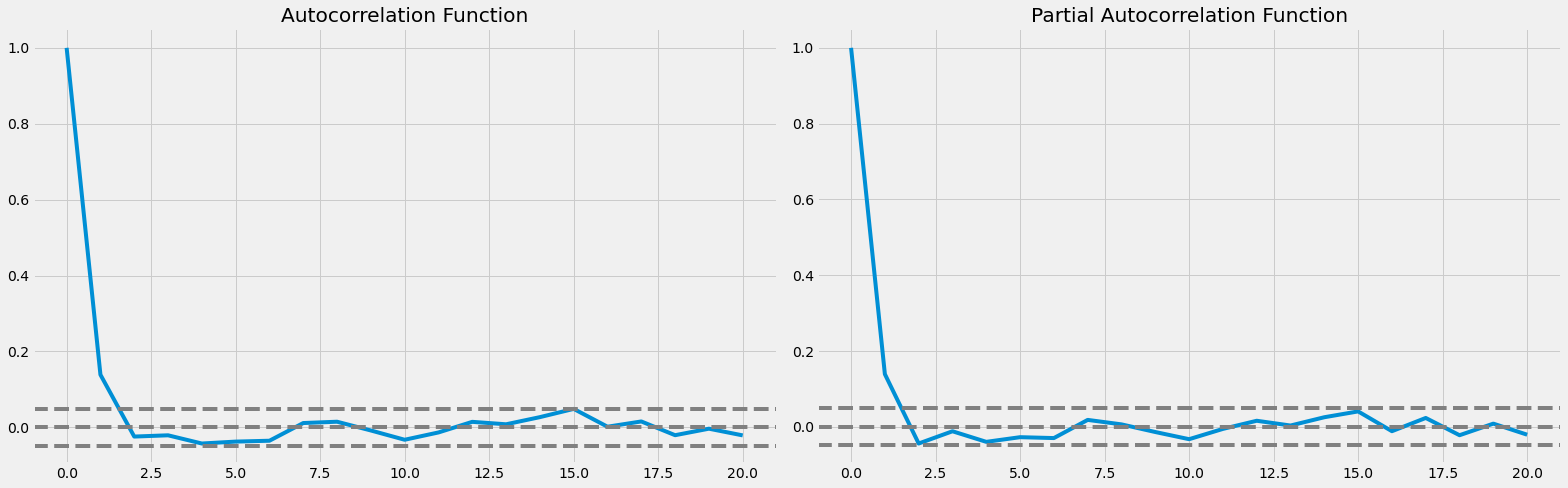

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_diff, nlags=20)
lag_pacf = pacf(data_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

##Train and Test split

In [ ]:
train, test = train_test_split(data_diff, 0.7)

In [ ]:
print(train.shape, test.shape)

(1135,) (487,)


In [ ]:
Test_Stationarity2(train)

ADF Statistic: -29.687983905306595
p-value: 0.0
Series is Stationary
KPSS Test Statistics: 0.14447369320272985
p-value: 0.052826494069018785
Series is Stationary


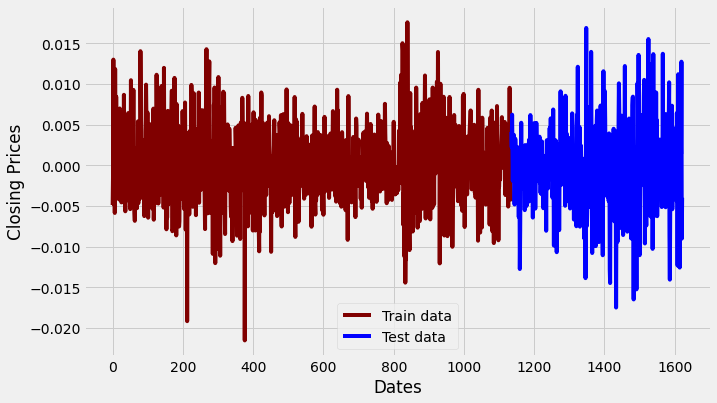

In [ ]:
plot_train_test(train, test)

##ARIMA Model

###Auto ARIMA

Searching ARIMA parameters

In [ ]:
automodel = arimamodel(train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8922.239, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8439.007, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8656.044, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8870.500, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8441.007, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8897.416, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8948.804, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8983.496, Time=1.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-9016.436, Time=1.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-9004.677, Time=0.85 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-9042.352, Time=0.67 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-9024.576, Time=0.77 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-8951.839, Time=1.73 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,4)(0,0,0)[0]  

In [ ]:
stepwise=arimamodel2(train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-8715.681, Time=1.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-7563.895, Time=0.37 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-8107.645, Time=2.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.95 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=6.18 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=11.00 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-8393.641, Time=0.63 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=2.97 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=3.27 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-8747.424, Time=2.93 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=-8798.598, Time=5.46 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-8494.371, Time=3.69 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf

In [ ]:
automodel.fit(train)

ARIMA(order=(0, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
stepwise.fit(train)

ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

###Forecasting on the test data

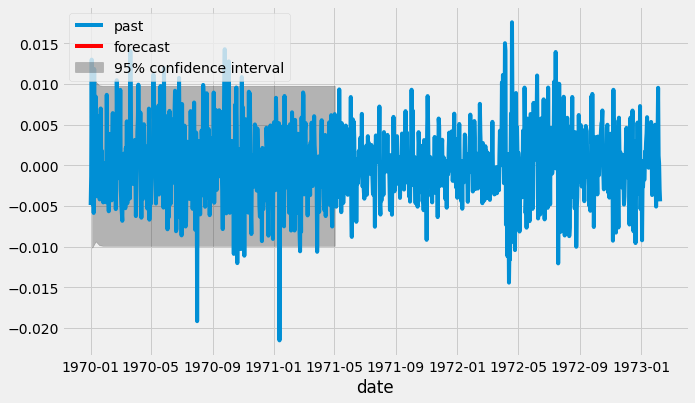

In [ ]:
plotarima(70, train, automodel)

In [ ]:
arima_prediction(data_diff, (0, 1, 4))

AttributeError: ignored

In [ ]:
res = ARIMA(data_diff, (0, 1, 4))).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()

SyntaxError: ignored

In [ ]:
future_forecast = arimamodel2(data_diff)
#print(future_forecast)

In [ ]:
forecast=arimamodel(data_diff)
#print(forecast)

In [ ]:
period=len(test)

In [ ]:
# This returns an array of predictions:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()
pd.concat([data_diff,future_forecast],axis=1).iplot()

In [ ]:
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction1'])
pd.concat([test,forecast],axis=1).iplot()
pd.concat([data_diff,forecast],axis=1).iplot()

In [ ]:
Results = future_forecast.copy()
Results['Prediction1']=forecast.Prediction1
Results.head()

#Accuracy Metrics

In [ ]:
#Regression_metrics
#Regression_metrics(test, pred)

#classification_metrics
#classification_metrics(y_test, y_pred)

#Recurrent Neural Networks(RNN)


## Feature Selection and Scaling

In [ ]:
# Indexing Batches

col='Close'
train_df = Data.sort_values(by=['Date']).copy()

# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Close', 'Adj Close', 'Volume',
            #, 'Month', 'Year', 'Adj Close'
           ]
#print('FEATURE LIST')
#print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext[col]

# Print the tail of the dataframe
#data_filtered_ext.tail()

Create the dataset with features and filter

## Data Scaling



In [ ]:
# Scaling the data for training
scaler = MinMaxScaler()
# This takes a lot of time

# Convert the dataframe into a numpy array
data_np = data_filtered_ext.drop(columns='Prediction').values
# We only want to scale the Data, so we take all the columns except the last on that is the prediction
scaled_data = scaler.fit_transform(data_np)

# Scaled data
scaled_data
# We add the prediction column back to the dataset
scaled_data_ext = np.append(scaled_data, data_filtered_ext['Prediction'].values.reshape(-1, 1), axis=1)

# We create a new dataframe with the scaled dataset
scaled_dataframe = pd.DataFrame(scaled_data_ext, columns=data_filtered_ext.columns)

In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
#print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext[col])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

## Transforming the Data

In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train2 = np_data_scaled[0:train_data_len, :]
test2 = np_data_scaled[train_data_len - sequence_length:, :]

#Splitted Data
#train2, test2 = train_test_split(data_diff, 0.7)

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction

    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train2)
x_test, y_test = partition_dataset(sequence_length, test2)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

## Train the Multivariate Prediction Model

In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

Training the model

In [ ]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )

                    #callbacks=[early_stop])

Loss Values Plot

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

##Predicted Values

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))


## Evaluate Model Performance

In [ ]:
#Regression_metrics
Regression_metrics(y_test, y_pred)

#classification_metrics
#classification_metrics(y_test, y_pred)

Plot

In [ ]:
# Create a plot with regressor, true data and predictions
plt.figure(figsize=(20, 5))
plt.scatter(range(y_test_unscaled.shape[0]), y_test_unscaled, marker='+', label='true')
plt.scatter(range(y_pred.shape[0]), y_pred, marker='o', label='predicted')
plt.ylabel('Values')
plt.xlabel('Observation rows')
plt.title('True vs. predicted values')
plt.legend(loc='lower right')
plt.show()

## The Prediction Plot

In [ ]:
# The date from which on the date is displayed
display_start_date = "2020-6-01"

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext[col][:train2_len + 1]).rename(columns={col: 'train'})
valid = pd.DataFrame(data_filtered_ext[col][train2_len:]).rename(columns={col: 'valid'})
valid.insert(1, "predict", y_pred, True)
valid.insert(1, "residuals", valid["predict"] - valid["valid"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
plt.style.use("fivethirtyeight")
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("predict vs valid")
plt.ylabel(1301, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['predict', 'train', 'valid']], linewidth=3.0, dashes=False, ax=ax1)

In [ ]:
#https://github.com/flo7up/relataly-public-python-tutorials/blob/master/003%20Time%20Series%20Forecasting%20-%20Univariate%20Model%20using%20Recurrent%20Neural%20Networks.ipynb

# Research Articles

1.   https://github.com/flo7up/relataly-public-python-tutorials/blob/master/003%20Time%20Series%20Forecasting%20-%20Univariate%20Model%20using%20Recurrent%20Neural%20Networks.ipynb

2.   https://github.com/flo7up/relataly-public-python-tutorials/blob/master/005%20Time%20Series%20Forecasting%20-%20Multi-step%20Rolling%20Forecasting.ipynb


3.   https://deepnote.com/@fridrik-hafdisarson/M3-GROUP-ASSIGNMENT-0a91a105-d950-4ead-be9c-62fc16f5cfe8

